In [1]:
from ema_workbench import load_results


In [4]:
# Load experiments and outcomes from the base case scenario
experiments, outcomes = load_results(f'results/10000 scenarios for base policy pf 3.tar.gz')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ema_workbench.analysis import parcoords
from problem_formulation import get_model_for_problem_formulation

## Select Experiments of Interest

In [8]:
print(experiments)

      A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax   
0                          51  161.625775       1.0   0.459595  140.467205  \
1                         121  196.723936      10.0   0.570237  271.900179   
2                         103  262.805219       1.5   0.511349  151.743072   
3                         119  306.038979       1.0   0.901178   33.181735   
4                           6  238.297735       1.0   0.946633  208.409007   
...                       ...         ...       ...        ...         ...   
9995                       32  339.638418       1.0   0.601936  151.439999   
9996                       74  283.090839      10.0   0.209699  304.334681   
9997                      131  204.673426       1.0   0.991353   82.195871   
9998                       95  306.182941      10.0   0.402575  284.966888   
9999                      115  114.898265       1.0   0.676271  153.154013   

     A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...

In [9]:
## Possible way to get experiments of interest
# Using the PRIM results to adjust the ranges of uncertainty values

experiments.loc[(experiments['A.1_Bmax'] >= 30) & (experiments['A.1_Bmax'] <= 350) &
                (experiments['A.1_Brate'].isin([0.9, 1.5, 1000])) &
                (experiments['A.1_pfail'] >= 0) & (experiments['A.1_pfail'] <= 0.35) &

                (experiments['A.2_Bmax'] >= 30) & (experiments['A.2_Bmax'] <= 350) &
                (experiments['A.2_Brate'].isin([0.9, 1.5, 1000])) &
                (experiments['A.2_pfail'] >= 0) & (experiments['A.2_pfail'] <= 0.35) &

                (experiments['A.3_Bmax'] >= 30) & (experiments['A.3_Bmax'] <= 350) &
                (experiments['A.3_Brate'].isin([0.9, 1.5, 1000])) &
                (experiments['A.3_pfail'] >= 0) & (experiments['A.3_pfail'] <= 1.00) &

                (experiments['A.4_Bmax'] >= 30) & (experiments['A.4_Bmax'] <= 350) &
                (experiments['A.4_Brate'].isin([0.9, 1.5, 1000])) &
                (experiments['A.4_pfail'] >= 0) & (experiments['A.4_pfail'] <= 1.00) &

                (experiments['A.5_Bmax'] >= 30) & (experiments['A.5_Bmax'] <= 350) &
                (experiments['A.5_Brate'].isin([0.9, 1.5, 1000])) &
                (experiments['A.5_pfail'] >= 0) & (experiments['A.5_pfail'] <= 1.00) &

                (experiments['discount rate 1'].isin([1.5, 2.5, 3.5, 4.5])) &
                (experiments['discount rate 2'].isin([1.5, 2.5, 3.5, 4.5]))
]

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
763,105,262.027756,1.5,0.085833,45.243493,1.5,0.069741,56.167404,1.5,0.708586,...,0,0,0,0,0,0,0,763,policy 1,dikesnet
2216,62,100.834183,1.5,0.000200,307.868818,1.5,0.298891,79.312297,1.5,0.107941,...,0,0,0,0,0,0,0,2216,policy 1,dikesnet
8938,111,140.937046,1.5,0.195557,173.133212,1.5,0.112379,114.845825,1.5,0.303375,...,0,0,0,0,0,0,0,8938,policy 1,dikesnet


In [10]:
from sklearn import preprocessing

# Select experiments on by the uncertainty value(s)
y = (experiments['A.4_pfail'] < 0.05)
experiments_of_interest = experiments.loc[y]
outcomes_df = pd.DataFrame({k:v[y] for k,v in outcomes.items()})

# normalize outcomes on unit interval to ensure equal weighting of outcomes
x = outcomes_df.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalized_outcomes = pd.DataFrame(x_scaled, columns=outcomes_df.columns)

In [11]:
experiments_of_interest

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,scenario,policy,model
41,59,248.834167,1.0,0.472955,316.490704,10.0,0.429713,118.866118,1.0,0.850894,...,0,0,0,0,0,0,0,41,policy 1,dikesnet
106,54,284.333130,10.0,0.497403,184.689468,1.0,0.511861,163.390557,10.0,0.339082,...,0,0,0,0,0,0,0,106,policy 1,dikesnet
165,96,331.699316,1.5,0.813364,151.879041,1.5,0.673533,246.216976,10.0,0.531792,...,0,0,0,0,0,0,0,165,policy 1,dikesnet
277,11,50.331866,1.5,0.796115,325.743194,1.5,0.370611,49.013717,10.0,0.522663,...,0,0,0,0,0,0,0,277,policy 1,dikesnet
299,96,186.636717,10.0,0.036657,93.075363,1.5,0.151243,123.674688,1.0,0.408432,...,0,0,0,0,0,0,0,299,policy 1,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9911,68,130.476857,10.0,0.044967,91.868842,1.5,0.377858,327.542644,1.5,0.848614,...,0,0,0,0,0,0,0,9911,policy 1,dikesnet
9925,24,222.329102,1.5,0.079048,141.137885,10.0,0.844046,150.916800,1.5,0.819929,...,0,0,0,0,0,0,0,9925,policy 1,dikesnet
9948,120,102.432917,1.0,0.129247,327.459368,1.5,0.948691,284.379914,1.5,0.740044,...,0,0,0,0,0,0,0,9948,policy 1,dikesnet
9975,125,95.245527,1.5,0.902039,267.626240,1.5,0.433597,67.632348,10.0,0.067627,...,0,0,0,0,0,0,0,9975,policy 1,dikesnet


## Select Scenarios to Consider

In [12]:
import itertools

n_scen = experiments.loc[y].shape[0]
indices = range(n_scen)
set_size = 3
combinations = itertools.combinations(indices, set_size)
combinations = list(combinations)

In [13]:
print(len(combinations))

20708500


In [14]:
import random

# Select a 100.000 random combinations
sampled_combinations = random.sample(combinations, 100000)

In [15]:
from concurrent.futures import ProcessPoolExecutor
import os
import functools
from scipy.spatial.distance import pdist, squareform

# the relevant code is in a .py file to esnure parallization works within the notebook
from assignment_10_scenario_selection import find_maxdiverse_scenarios

# calculate the pairwise distances between the normalized outcomes
distances = squareform(pdist(normalized_outcomes.values))

cores = os.cpu_count()
partial_function = functools.partial(find_maxdiverse_scenarios, distances)

# setup the pool of workers and split the calculations over the set of cores
with ProcessPoolExecutor(max_workers=cores) as executor:
    worker_data = np.array_split(sampled_combinations, cores)
    results = [e for e in executor.map(partial_function, worker_data)]
    results = list(itertools.chain.from_iterable(results))

In [16]:
results.sort(key=lambda entry:entry[0], reverse=True)
most_diverse = results[0]
most_diverse

([2.0812338501972354], array([ 30, 366, 427]))

In [17]:
dike_model, planning_steps = get_model_for_problem_formulation(3)

# list the names of all uncertainties
uncertainties_list = []

for unc in dike_model.uncertainties:
    uncertainties_list.append(unc.name)

In [18]:
from ema_workbench import Scenario

selected = experiments.loc[most_diverse[1], uncertainties_list]
scenarios = [Scenario(f"{index}", **row) for index, row in selected.iterrows()]

for scenario in scenarios:
    print(scenario)

Scenario({'discount rate 0': 2.5, 'discount rate 1': 3.5, 'discount rate 2': 1.5, 'A.0_ID flood wave shape': 112.0, 'A.1_Bmax': 173.20861876208147, 'A.1_pfail': 0.5869337715719894, 'A.1_Brate': 10.0, 'A.2_Bmax': 38.982282953712414, 'A.2_pfail': 0.4321716271761206, 'A.2_Brate': 1.0, 'A.3_Bmax': 285.87865346629485, 'A.3_pfail': 0.3364537223458125, 'A.3_Brate': 1.0, 'A.4_Bmax': 211.51996480314008, 'A.4_pfail': 0.9660036444814528, 'A.4_Brate': 1.0, 'A.5_Bmax': 33.97947695367343, 'A.5_pfail': 0.3850233775434173, 'A.5_Brate': 10.0})
Scenario({'discount rate 0': 2.5, 'discount rate 1': 1.5, 'discount rate 2': 4.5, 'A.0_ID flood wave shape': 111.0, 'A.1_Bmax': 143.1017448912337, 'A.1_pfail': 0.4954573189851433, 'A.1_Brate': 10.0, 'A.2_Bmax': 36.55825081134613, 'A.2_pfail': 0.5127923639682309, 'A.2_Brate': 1.5, 'A.3_Bmax': 61.402104846724015, 'A.3_pfail': 0.8051905087964887, 'A.3_Brate': 1.5, 'A.4_Bmax': 213.3250024899624, 'A.4_pfail': 0.4034974293871301, 'A.4_Brate': 1.5, 'A.5_Bmax': 121.96698

## Search for each scenario

In [19]:
nr_of_seeds = 2

In [20]:
from ema_workbench import MultiprocessingEvaluator, ema_logging

from ema_workbench.em_framework.optimization import (ArchiveLogger,
                                                     EpsilonProgress,
                                                     to_problem, epsilon_nondominated)

ema_logging.log_to_stderr(ema_logging.INFO)

def optimize(scenario, nfe, model, epsilons):
    results = []
    convergences = []
    # problem = to_problem(model, searchover="levers")

    with MultiprocessingEvaluator(model) as evaluator:
        # for i in range(5):
        for i in range(nr_of_seeds):
            convergence_metrics = [
                ArchiveLogger(
                    "./archives",
                    [lever.name for lever in model.levers],
                    [outcome.name for outcome in model.outcomes],
                    base_filename=f"M_{scenario.name}_seed_{i}.tar.gz",
                ),
                EpsilonProgress(),
            ]

            result, convergence = evaluator.optimize(nfe=nfe, searchover='levers',
                                         convergence=convergence_metrics,
                                         epsilons=epsilons,
                                         reference=scenario)
            results.append(result)
            convergences.append(convergence)


    # print(results)

    return results, epsilons, convergences

READ_REF = False

if READ_REF:
    ref_archives = []
    ref_convs = []
    # sd = 2
    scens = [86, 141, 366]
    for s in scens:
        for i in range(2):
            archives = ArchiveLogger.load_archives(f"./ref_archives/M_{s}_seed_{i}.tar.gz")
            convs = pd.read_csv(f'results/convergences1_{s}_[{i}]_results.csv')
            ref_archives.append(archives)
            ref_convs.append(convs)

else:
    results = []
    for scenario in scenarios:
        # epsilons = [0.05,]*len(model.outcomes)
        epsilons = [0.1,]*len(dike_model.outcomes)

        # results.append(optimize(scenario, 1e5, model, epsilons))
        results.append(optimize(scenario, 1e3, dike_model, epsilons))


[MainProcess/INFO] pool started with 12 workers
1098it [02:59,  6.13it/s]                                                      
[MainProcess/INFO] optimization completed, found 313 solutions
1098it [03:05,  5.91it/s]                                                      
[MainProcess/INFO] optimization completed, found 380 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started with 12 workers
1088it [02:55,  6.21it/s]                                                      
[MainProcess/INFO] optimization completed, found 390 solutions
1095it [02:57,  6.17it/s]                                                      
[MainProcess/INFO] optimization completed, found 256 solutions
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started with 12 workers
1095it [03:12,  5.70it/s]                                                      
[MainProcess/INFO] optimization completed, found 275 solutions
1098it [02:54,  6.29it/s]                                            

The function that merges the results using a non-dominated sort requires the names of the columns of the  result dataframe to be formatted a bit differently so they match the names of the parameters and outcomes. Therefore, these names are adjusted before the results are merged.

In [24]:
dike_model, planning_steps = get_model_for_problem_formulation(3)

dike_model2 = dike_model
cols = []

# Renaming levers
for i,l in enumerate(dike_model.levers):
    cols.append(l.name)

    dike_model2.levers[i].name = l.name.replace(' ', '_')
    dike_model2.levers[i].name = "param_" + dike_model2.levers[i].name.replace('.', '')

# Renaming outcomes
for i,o in enumerate(dike_model.outcomes):
    cols.append(o.name)

    dike_model2.outcomes[i].name = o.name.replace(' ', '_')
    dike_model2.outcomes[i].name = "param_" + dike_model2.outcomes[i].name.replace('.', '')

problem1 = to_problem(dike_model2, searchover="levers")

if READ_REF:  # If using the reference archive
    results_read =[]
    converges_read = []
    scens = [86, 141, 366]
    for i, s in enumerate(scens):

        r1 = ref_convs[i*2].drop(columns=['Unnamed: 0'])
        r2 = ref_convs[(i*2)+1].drop(columns=['Unnamed: 0'])

        converges_read.append([r1, r2])

    for i,v in enumerate(ref_archives):
        ref_res = pd.concat(v, ignore_index=True)
        ref_res.drop(columns=['Unnamed: 0'], inplace=True)

        ref_res.columns = cols

        ref_res.columns = ref_res.columns.str.replace(' ', '_',)
        ref_res.columns = 'param_' + ref_res.columns.str.replace('.', '',)

        results_read.append(ref_res)

else:
    results1 =[]
    converges1 = []
    for i,v in enumerate(results):

        for e,u in enumerate(results[i][0]):

            results[i][0][e].columns = cols

            results[i][0][e].columns = results[i][0][e].columns.str.replace(' ', '_',)
            results[i][0][e].columns = 'param_' + results[i][0][e].columns.str.replace('.', '',)

        results1.append(pd.concat(results[i][0], ignore_index=True))
        converges1.append(results[i][2])

    from ema_workbench import save_results
    save_to_cvs = False

    for i,con in enumerate(converges1):

        for nr, s in enumerate(con):
            print(s)
            file_name = f'convergences1_{i}[{nr}]_results.tar.gz'
            # save_results(s, 'results/' + file_name)
            if save_to_cvs:
                s.to_csv(f'results/convergences1_{scenarios[i].name}_[{nr}]_results.csv')

    #     results1 = pd.concat(results1, ignore_index=True)
#
# results1.columns = results1.columns.str.replace(' ', '_',)
# results1.columns = 'param_' + results1.columns.str.replace('.', '',)

   epsilon_progress   nfe
0                 0     0
1                84   100
2               688  1098
   epsilon_progress   nfe
0                 0     0
1                80   100
2               716  1098
   epsilon_progress   nfe
0                 0     0
1                70   100
2               541  1088
   epsilon_progress   nfe
0                 0     0
1                89   100
2               512  1095
   epsilon_progress   nfe
0                 0     0
1                88   100
2               743  1095
   epsilon_progress   nfe
0                 0     0
1                72   100
2               709  1098


In [26]:
len(results1)

3

In [27]:
# pd.DataFrame(converges1[0][0])

In [28]:
# results1

In [30]:
# pd.DataFrame(converges1[0][0])

In [31]:
conv_results = []
reference_set1 = []

for i, v in enumerate(results1):

    # merge the results using a non-dominated sort
    reference_set = epsilon_nondominated([results1[i]], [0.1,]*len(dike_model.outcomes), problem1)
    conv_results.append((reference_set, converges1[i]))



In [32]:
conv_results

[(     param_0_RfR_0  param_0_RfR_1  param_0_RfR_2  param_1_RfR_0   
  0                1              0              0              1  \
  1                0              1              0              1   
  2                1              1              0              1   
  3                1              1              1              0   
  4                1              1              0              1   
  ..             ...            ...            ...            ...   
  510              0              1              0              0   
  511              1              1              1              0   
  512              1              0              0              1   
  513              1              1              1              1   
  514              1              1              1              0   
  
       param_1_RfR_1  param_1_RfR_2  param_2_RfR_0  param_2_RfR_1   
  0                1              0              1              1  \
  1                1           

In [34]:
# reference_set1 = pd.concat(reference_set1)


In [36]:
# reference_set1.head()

## Convergence Metrics

In [37]:
from platypus import Hypervolume
from ema_workbench.em_framework.optimization import rebuild_platypus_population

def calculate_convergence_metrics(problem, archives_file):
    # Hypervolume takes too long because of the large number of objectives
    # So for simplicity, the code of assignment 10 is adapted with nonsense values for the hypervolume
    hv = Hypervolume(minimum=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     maximum=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

    archives = ArchiveLogger.load_archives(archives_file)
    metrics = []
    for nfe, archive in archives.items():

        archive.columns = archive.columns.str.replace(' ', '_',)
        archive.columns = 'param_' + archive.columns.str.replace('.', '',)

        archive.drop(columns=['param_Unnamed:_0'], inplace=True)

        population = rebuild_platypus_population(archive, problem)
        metrics.append(dict(hypervolume=hv.calculate(population), nfe=nfe))

    metrics = pd.DataFrame.from_dict(metrics)
    metrics.sort_values(by="nfe", inplace=True, ignore_index=True)
    return metrics

convergence_calculations = []

for (refset, eps_progress), scenario in zip(conv_results, scenarios):
    for seed, seed_eps in zip(range(nr_of_seeds), eps_progress):
        archive_file = f"./archives/M_{scenario.name}_seed_{seed}.tar.gz"
        metrics = calculate_convergence_metrics(problem1, archive_file)
        metrics["seed"] = seed
        metrics["scenario"] = scenario.name
        metrics["epsilon_progress"] = seed_eps.epsilon_progress

        convergence_calculations.append(metrics)
convergence = pd.concat(convergence_calculations, ignore_index=True)

In [38]:
problem1.nobjs

12

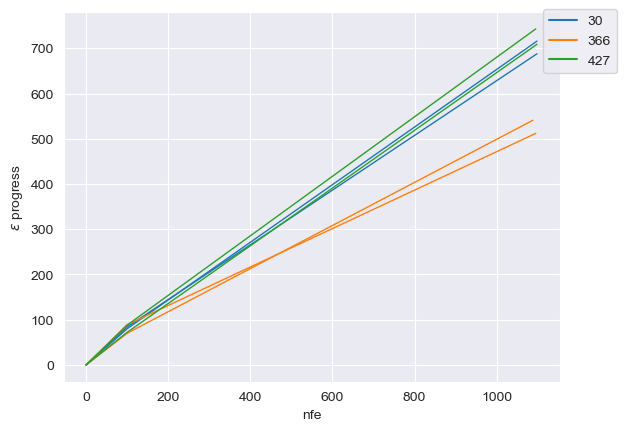

In [39]:
import matplotlib as mpl
import seaborn as sns

if not READ_REF:

    fig, ax1 = plt.subplots(ncols=1)

    colors = sns.color_palette()

    legend_items = []
    for (scenario_name, scores), color in zip(convergence.groupby("scenario"), colors):
        # we use this for a custom legend
        legend_items.append((mpl.lines.Line2D([0, 0], [1, 1], c=color), scenario_name))
        for seed, score in scores.groupby("seed"):

            ax1.plot(score.nfe, score.epsilon_progress, c=color, lw=1)


    ax1.set_ylabel('$\epsilon$ progress')
    ax1.set_xlabel('nfe')

    # create our custom legend
    artists, labels = zip(*legend_items)
    fig.legend(artists, labels, bbox_to_anchor=(1,0.9))

    plt.show()

## Re-evaluate under deep uncertainty

In [40]:
# Reintroduce dike_model to ensure the right parameter/outcome names will be used
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [41]:
cols = []

for l in dike_model.levers:
    cols.append(l.name)

for l in dike_model.outcomes:
    cols.append(l.name)


In [42]:
conv_results2 = conv_results

# Rename column names to original model names
for i,v in enumerate(conv_results2):
    for e, u in enumerate(v[0].columns):
        v[0].rename(columns={u : cols[e]}, inplace=True)


In [43]:
from ema_workbench import Policy

# Create Policy objects using conv_results2
policies = []
for i, (result, _) in enumerate(conv_results2):
    result = result.iloc[:, 0:len(dike_model.levers)]
    for j, row in result.iterrows():
        policy = Policy(f'scenario {i} option {j}', **row.to_dict())
        policies.append(policy)

In [44]:
# Print all policies
for p in policies:
    print(f'{p}\n')

Policy({'0_RfR 0': 1, '0_RfR 1': 0, '0_RfR 2': 0, '1_RfR 0': 1, '1_RfR 1': 1, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 1, '2_RfR 2': 1, '3_RfR 0': 0, '3_RfR 1': 0, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 0, '4_RfR 2': 0, 'EWS_DaysToThreat': 4, 'A.1_DikeIncrease 0': 5, 'A.1_DikeIncrease 1': 2, 'A.1_DikeIncrease 2': 8, 'A.2_DikeIncrease 0': 3, 'A.2_DikeIncrease 1': 1, 'A.2_DikeIncrease 2': 9, 'A.3_DikeIncrease 0': 0, 'A.3_DikeIncrease 1': 0, 'A.3_DikeIncrease 2': 2, 'A.4_DikeIncrease 0': 10, 'A.4_DikeIncrease 1': 8, 'A.4_DikeIncrease 2': 6, 'A.5_DikeIncrease 0': 7, 'A.5_DikeIncrease 1': 1, 'A.5_DikeIncrease 2': 5})

Policy({'0_RfR 0': 0, '0_RfR 1': 1, '0_RfR 2': 0, '1_RfR 0': 1, '1_RfR 1': 1, '1_RfR 2': 0, '2_RfR 0': 1, '2_RfR 1': 0, '2_RfR 2': 1, '3_RfR 0': 1, '3_RfR 1': 1, '3_RfR 2': 0, '4_RfR 0': 0, '4_RfR 1': 1, '4_RfR 2': 1, 'EWS_DaysToThreat': 3, 'A.1_DikeIncrease 0': 0, 'A.1_DikeIncrease 1': 2, 'A.1_DikeIncrease 2': 0, 'A.2_DikeIncrease 0': 4, 'A.2_DikeIncrease 1': 4, 'A.2_DikeIncrea

In [45]:
len(pd.DataFrame(policies))

1462

In [46]:
policies_df = pd.DataFrame(policies)

for i in np.arange(5):

    policies_df[f'min_DikeIncrease_A{i+1}'] = policies_df[[f'A.{i+1}_DikeIncrease 0', f'A.{i+1}_DikeIncrease 1',f'A.{i+1}_DikeIncrease 2']].min(axis=1)
    policies_df = policies_df.drop(policies_df.index[policies_df[f'min_DikeIncrease_A{i+1}'] != 0])

len(policies_df)

14

In [47]:
policies_df.head(50)

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,min_DikeIncrease_A1,min_DikeIncrease_A2,min_DikeIncrease_A3,min_DikeIncrease_A4,min_DikeIncrease_A5
23,0,0,1,1,1,1,1,0,0,1,...,5,8,0,3,3,0,0,0,0,0
551,1,0,1,1,0,0,1,1,0,1,...,9,0,1,7,0,0,0,0,0,0
642,1,1,0,1,1,0,0,0,1,0,...,8,0,4,2,3,0,0,0,0,0
790,0,1,1,0,0,1,1,1,1,0,...,0,0,4,7,2,0,0,0,0,0
931,1,0,0,1,1,0,0,0,0,0,...,3,1,0,1,3,0,0,0,0,0
1112,1,1,0,0,0,1,1,0,1,1,...,5,1,0,2,0,0,0,0,0,0
1156,1,1,0,1,0,1,0,0,0,1,...,5,3,0,7,0,0,0,0,0,0
1236,1,1,0,1,1,0,1,1,0,1,...,0,2,5,0,0,0,0,0,0,0
1283,0,0,1,0,1,1,0,0,1,1,...,7,4,0,3,3,0,0,0,0,0
1338,0,0,1,1,1,1,0,1,1,0,...,5,0,1,5,3,0,0,0,0,0


In [111]:
policies_df[0:10]

ps = []

for j, row in policies_df.head(30).iterrows():
        ps.append(Policy(f'scenario {row} option {j}', **row.to_dict()))

In [112]:
for i in ps:
    print(i.name)
    print('\n')
print(len(ps))

scenario 0_RfR 0                 0
0_RfR 1                 0
0_RfR 2                 1
1_RfR 0                 1
1_RfR 1                 1
1_RfR 2                 1
2_RfR 0                 1
2_RfR 1                 0
2_RfR 2                 0
3_RfR 0                 1
3_RfR 1                 1
3_RfR 2                 1
4_RfR 0                 0
4_RfR 1                 0
4_RfR 2                 1
A.1_DikeIncrease 0      7
A.1_DikeIncrease 1      0
A.1_DikeIncrease 2      4
A.2_DikeIncrease 0     10
A.2_DikeIncrease 1      0
A.2_DikeIncrease 2      4
A.3_DikeIncrease 0      4
A.3_DikeIncrease 1      0
A.3_DikeIncrease 2      0
A.4_DikeIncrease 0      9
A.4_DikeIncrease 1      0
A.4_DikeIncrease 2      5
A.5_DikeIncrease 0      8
A.5_DikeIncrease 1      0
A.5_DikeIncrease 2      3
EWS_DaysToThreat        3
min_DikeIncrease_A1     0
min_DikeIncrease_A2     0
min_DikeIncrease_A3     0
min_DikeIncrease_A4     0
min_DikeIncrease_A5     0
Name: 23, dtype: int64 option 23
scenario 0_RfR 0      

In [113]:
# pd.DataFrame(policies).to_csv(r'C:\Users\sonny\Documents\MASTER CME\Q4\EPA1361_Model\Repo\epa1361_open\final assignment_trying\results\policies.csv', sep=',')

In [114]:
with MultiprocessingEvaluator(dike_model, n_processes=-2) as evaluator:
    reeevaluation_results = evaluator.perform_experiments(1000, policies=ps)

[MainProcess/INFO] pool started with 10 workers
[MainProcess/INFO] performing 1000 scenarios * 14 policies * 1 model(s) = 14000 experiments
100%|████████████████████████████████████| 14000/14000 [46:41<00:00,  5.00it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [115]:
# Save the generated experiments
s_nr = 2
save_reeval = True

l_nr = 1
load_reeval = False

if save_reeval:
    file_name = f'reeevaluation_results_nr{s_nr}_.tar.gz'
    save_results(reeevaluation_results, 'results/' + file_name)

if load_reeval:
    reeevaluation_results = load_results(f'results/reeevaluation_results_nr{l_nr}_.tar.gz')


[MainProcess/INFO] results saved successfully to C:\Users\sonny\Documents\MASTER CME\Q4\EPA1361_Model\Repo\epa1361_open\final assignment_trying\results\reeevaluation_results_nr2_.tar.gz


In [116]:
o_names = []

for o in dike_model.outcomes:
    print(o.name)
    o_names.append(o.name)

A.1 Total Costs
A.1_Expected Number of Deaths
A.2 Total Costs
A.2_Expected Number of Deaths
A.3 Total Costs
A.3_Expected Number of Deaths
A.4 Total Costs
A.4_Expected Number of Deaths
A.5 Total Costs
A.5_Expected Number of Deaths
RfR Total Costs
Expected Evacuation Costs


In [154]:
experiments, outcomes = reeevaluation_results

# setup a dataframe for the outcomes
# we add scenario and policy as additional columns
# we need scenario because regret is calculated on a scenario by scenario basis
# we add policy because we need to get the maximum regret for each policy.
outcomes = pd.DataFrame(outcomes)
lll = []
for c in outcomes.columns:
    lll.append(outcomes[f'{c}'].max(numeric_only=True))
print(lll)
outcomes['scenario'] = experiments.scenario
outcomes['policy'] = experiments.policy

def calculate_regret(x):

    norm = 1e6

    # policy is non numeric, so max is not defined for this
    best = x.min(numeric_only=True)
    best[f'RfR Total Costs'] = x[f'RfR Total Costs'].min()
    best['Expected Evacuation Costs'] = x['Expected Evacuation Costs'].min()

    # Expected number of deaths needs to be minimized, so best performance is minimum.
    for i in np.arange(5):
        best[f'A.{i+1} Total Costs'] = x[f'A.{i+1} Total Costs'].min()
        best[f'A.{i+1}_Expected Number of Deaths'] = x[f'A.{i+1}_Expected Number of Deaths'].min()

    regret = best -x.loc[:, best.index]
    regret[f'RfR Total Costs'] = (x[f'RfR Total Costs']- best[f'RfR Total Costs']) / norm
    regret[f'Expected Evacuation Costs'] = (x[f'Expected Evacuation Costs']- best[f'Expected Evacuation Costs']) / norm

    # again we need to handle expected number of deaths is minimised a bit different
    for i in np.arange(5):
        regret[f'A.{i+1} Total Costs'] = (x[f'A.{i+1} Total Costs']- best[f'A.{i+1} Total Costs']) / norm
        regret[f'A.{i+1}_Expected Number of Deaths'] = x[f'A.{i+1}_Expected Number of Deaths']- best[f'A.{i+1}_Expected Number of Deaths']

    # we add policy back into our regret dataframe
    # so we know the regret for each policy
    regret['policy'] = x.policy
    return regret

# we want to calculate regret on a scenario by scenario basis
regret = outcomes.groupby('scenario', group_keys=True).apply(calculate_regret)

# as last step, we calculate the maximum regret for each policy
max_regret = regret.groupby('policy', group_keys=True).max()

[3102771922.2757115, 1.7098891378202308, 1260977270.9371185, 0.868544508243335, 2832700213.3548703, 3.4700483291667075, 161004166.06084722, 0.04988650580088792, 1024940831.0902534, 0.7525787393840572, 1432800000.0, 108524.88101838095]


In [155]:
max_regret

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
policy,,,,,,,,,,,,
"scenario 0_RfR 0 0\n0_RfR 1 0\n0_RfR 2 1\n1_RfR 0 1\n1_RfR 1 1\n1_RfR 2 1\n2_RfR 0 1\n2_RfR 1 0\n2_RfR 2 0\n3_RfR 0 1\n3_RfR 1 1\n3_RfR 2 1\n4_RfR 0 0\n4_RfR 1 0\n4_RfR 2 1\nA.1_DikeIncrease 0 7\nA.1_DikeIncrease 1 0\nA.1_DikeIncrease 2 4\nA.2_DikeIncrease 0 10\nA.2_DikeIncrease 1 0\nA.2_DikeIncrease 2 4\nA.3_DikeIncrease 0 4\nA.3_DikeIncrease 1 0\nA.3_DikeIncrease 2 0\nA.4_DikeIncrease 0 9\nA.4_DikeIncrease 1 0\nA.4_DikeIncrease 2 5\nA.5_DikeIncrease 0 8\nA.5_DikeIncrease 1 0\nA.5_DikeIncrease 2 3\nEWS_DaysToThreat 3\nmin_DikeIncrease_A1 0\nmin_DikeIncrease_A2 0\nmin_DikeIncrease_A3 0\nmin_DikeIncrease_A4 0\nmin_DikeIncrease_A5 0\nName: 23, dtype: int64 option 23",95.979497,0.000000,135.947010,0.000000,2269.093445,0.386091,26.800461,0.000000,43.981926,0.000000,1055.3,0.107193
"scenario 0_RfR 0 0\n0_RfR 1 0\n0_RfR 2 1\n1_RfR 0 0\n1_RfR 1 0\n1_RfR 2 0\n2_RfR 0 0\n2_RfR 1 1\n2_RfR 2 1\n3_RfR 0 1\n3_RfR 1 0\n3_RfR 2 1\n4_RfR 0 1\n4_RfR 1 0\n4_RfR 2 0\nA.1_DikeIncrease 0 7\nA.1_DikeIncrease 1 0\nA.1_DikeIncrease 2 4\nA.2_DikeIncrease 0 4\nA.2_DikeIncrease 1 3\nA.2_DikeIncrease 2 0\nA.3_DikeIncrease 0 2\nA.3_DikeIncrease 1 4\nA.3_DikeIncrease 2 0\nA.4_DikeIncrease 0 0\nA.4_DikeIncrease 1 5\nA.4_DikeIncrease 2 7\nA.5_DikeIncrease 0 0\nA.5_DikeIncrease 1 2\nA.5_DikeIncrease 2 3\nEWS_DaysToThreat 3\nmin_DikeIncrease_A1 0\nmin_DikeIncrease_A2 0\nmin_DikeIncrease_A3 0\nmin_DikeIncrease_A4 0\nmin_DikeIncrease_A5 0\nName: 1457, dtype: int64 option 1457",1767.547123,0.131303,307.196185,0.042783,1114.337710,0.175436,62.889668,0.002910,530.269621,0.071491,311.4,0.060763
"scenario 0_RfR 0 0\n0_RfR 1 0\n0_RfR 2 1\n1_RfR 0 0\n1_RfR 1 1\n1_RfR 2 0\n2_RfR 0 1\n2_RfR 1 0\n2_RfR 2 0\n3_RfR 0 0\n3_RfR 1 0\n3_RfR 2 0\n4_RfR 0 0\n4_RfR 1 0\n4_RfR 2 0\nA.1_DikeIncrease 0 0\nA.1_DikeIncrease 1 3\nA.1_DikeIncrease 2 2\nA.2_DikeIncrease 0 4\nA.2_DikeIncrease 1 3\nA.2_DikeIncrease 2 0\nA.3_DikeIncrease 0 0\nA.3_DikeIncrease 1 2\nA.3_DikeIncrease 2 0\nA.4_DikeIncrease 0 0\nA.4_DikeIncrease 1 6\nA.4_DikeIncrease 2 5\nA.5_DikeIncrease 0 0\nA.5_DikeIncrease 1 7\nA.5_DikeIncrease 2 0\nEWS_DaysToThreat 0\nmin_DikeIncrease_A1 0\nmin_DikeIncrease_A2 0\nmin_DikeIncrease_A3 0\nmin_DikeIncrease_A4 0\nmin_DikeIncrease_A5 0\nName: 1456, dtype: int64 option 1456",3002.057022,1.709889,460.913520,0.502403,2758.754093,3.452966,92.504627,0.049511,684.941869,0.744080,0.0,0.000000
"scenario 0_RfR 0 0\n0_RfR 1 0\n0_RfR 2 1\n1_RfR 0 0\n1_RfR 1 1\n1_RfR 2 1\n2_RfR 0 0\n2_RfR 1 0\n2_RfR 2 1\n3_RfR 0 1\n3_RfR 1 1\n3_RfR 2 0\n4_RfR 0 0\n4_RfR 1 0\n4_RfR 2 0\nA.1_DikeIncrease 0 6\nA.1_DikeIncrease 1 0\nA.1_DikeIncrease 2 5\nA.2_DikeIncrease 0 0\nA.2_DikeIncrease 1 6\nA.2_DikeIncrease 2 1\nA.3_DikeIncrease 0 5\nA.3_DikeIncrease 1 0\nA.3_DikeIncrease 2 0\nA.4_DikeIncrease 0 2\nA.4_DikeIncrease 1 0\nA.4_DikeIncrease 2 7\nA.5_DikeIncrease 0 4\nA.5_DikeIncrease 1 0\nA.5_DikeIncrease 2 3\nEWS_DaysToThreat 3\nmin_DikeIncrease_A1 0\nmin_DikeIncrease_A2 0\nmin_DikeIncrease_A3 0\nmin_DikeIncrease_A4 0\nmin_DikeIncrease_A5 0\nName: 1283, dtype: int64 option 1283",94.050140,0.000259,506.180668,0.058955,2281.488459,0.388772,76.434569,0.004471,306.824841,0.043933,460.2,0.108096
"scenario 0_RfR 0 0\n0_RfR 1 0\n0_RfR 2 1\n1_RfR 0 1\n1_RfR 1 1\n1_RfR 2 1\n2_RfR 0 0\n2_RfR 1 1\n2_RfR 2 1\n3_RfR 0 0\n3_RfR 1 0\n3_RfR 2 1\n4_RfR 0 1\n4_RfR 1 0\n4_RfR 2 1\nA.1_DikeIncrease 0 0\nA.1_DikeIncrease 1 4\nA.1_DikeIncrease 2 5\nA.2_DikeIncrease 0 4\nA.2_DikeIncrease 1 3\nA.2_DikeIncrease 2 0\nA.3_DikeIncrease 0 7\nA.3_DikeIncrease 1 7\nA.3_DikeIncrease 2 0\nA.4_DikeIncrease 0 0\nA.4_DikeIncrease 1 3\nA.4_DikeIncrease 2 5\nA.5_DikeIncrease 0 0\nA.5_DikeIncrease 1 1\nA.5_DikeIncrease 2 5\nEWS_DaysToThreat 3\nmin_DikeIncrease

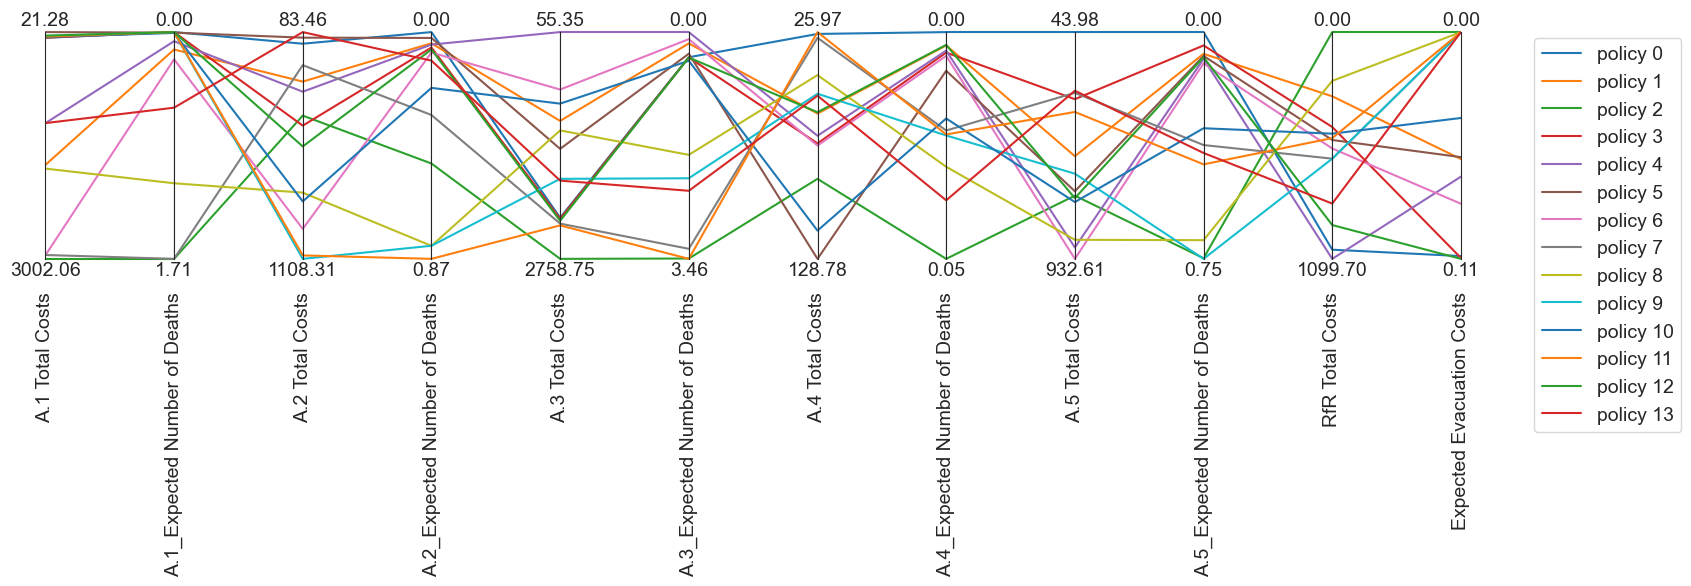

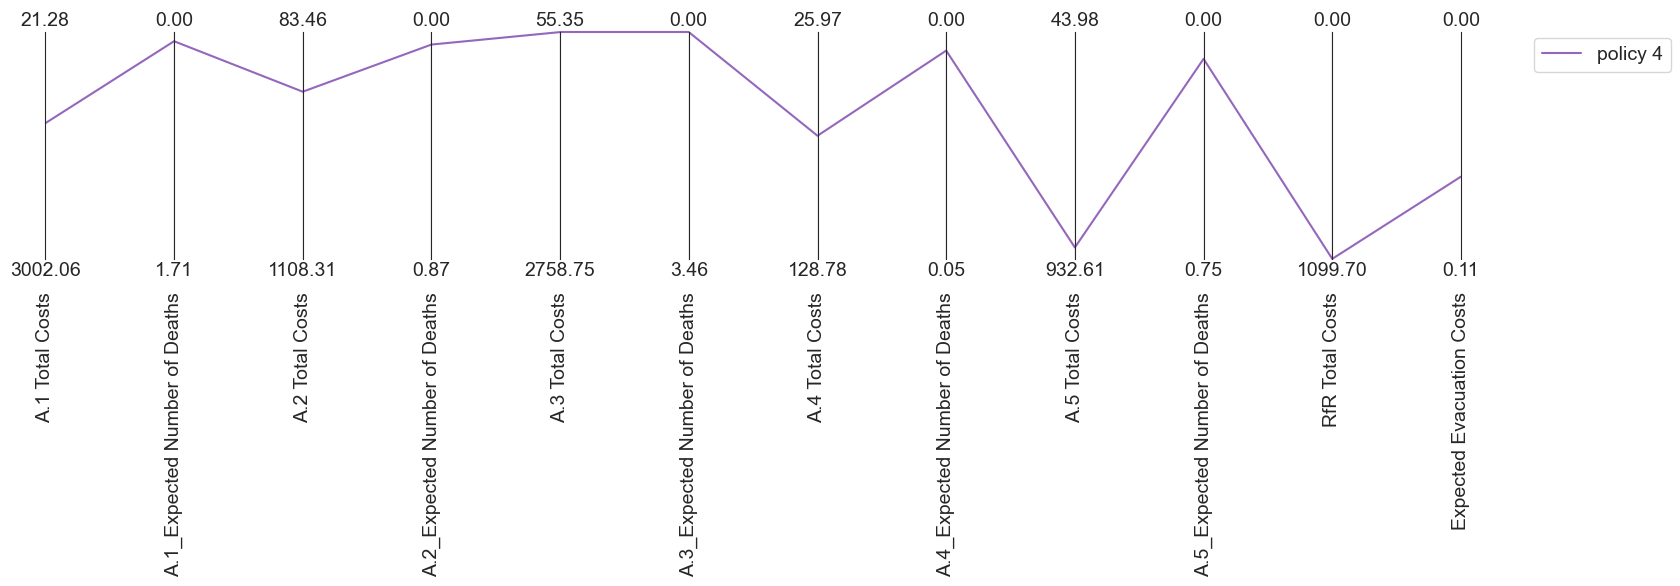

In [143]:
limits = parcoords.get_limits(max_regret)
paraxes = parcoords.ParallelAxes(limits)

colors = iter(sns.color_palette())
fig_w = 15
fig_h = 6

# Choose one policy to plot in a separate figure
isolated_policy_nr = 4
color_iso = 0

for i, row in enumerate(max_regret.iterrows()):
    try:
        color = next(colors)
    except StopIteration:
        # If all colors have been used, create a new iterator
        colors = iter(sns.color_palette())
        color = next(colors)
    paraxes.plot(max_regret.iloc[i], label=f'policy {i}', color=color)

    if i == isolated_policy_nr:
        color_iso = color

paraxes.invert_axis(o_names)
fig = plt.gcf()
fig.set_size_inches(fig_w, fig_h)

paraxes.legend()
plt.show()


# Plot the isolated policy
paraxes2 = parcoords.ParallelAxes(limits)
paraxes2.plot(max_regret.iloc[isolated_policy_nr], label=f'policy {isolated_policy_nr}', color=color_iso)

paraxes2.invert_axis(o_names)
fig = plt.gcf()
fig.set_size_inches(fig_w, fig_h)

paraxes2.legend()
plt.show()

In [120]:
def calculate_signal_to_noise(x):

    # policy is non numeric, so max is not defined for this
    mean_ = x.mean(numeric_only=True)
    std_ = x.std(numeric_only=True)

    s2n_ratio = (mean_ + 1e-4) / (std_ + 1e-4)
    s2n_ = x.loc[:, s2n_ratio.index]

    # we add policy back into our regret dataframe
    # so we know the regret for each policy
    s2n_['policy'] = x.policy
    return s2n_

# we want to calculate regret on a scenario by scenario basis
signal_to_noise = outcomes.groupby('scenario', group_keys=False).apply(calculate_signal_to_noise)

# as last step, we calculate the maximum regret for each policy
mean_signal_to_noise = signal_to_noise.groupby('policy').mean()

C:\Users\sonny\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


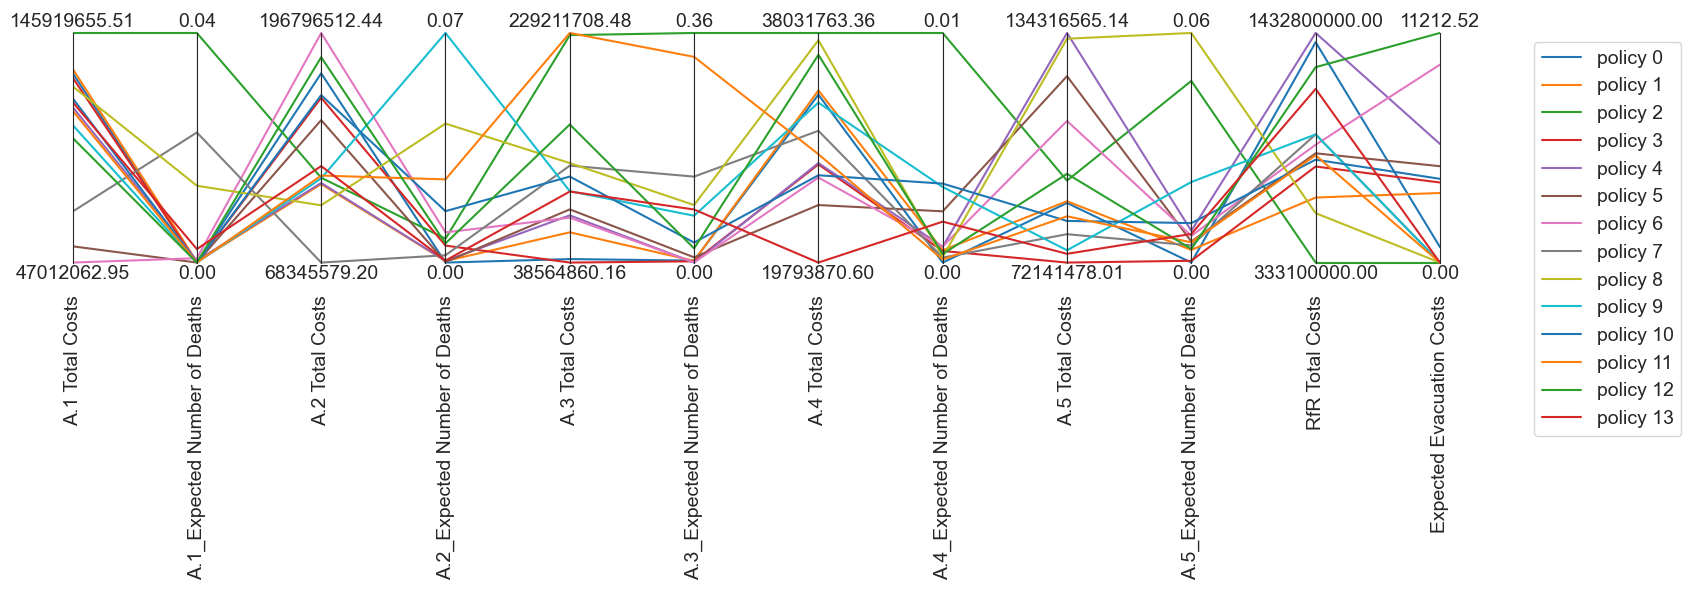

C:\Users\sonny\anaconda3\lib\site-packages\ema_workbench\analysis\parcoords.py:219: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


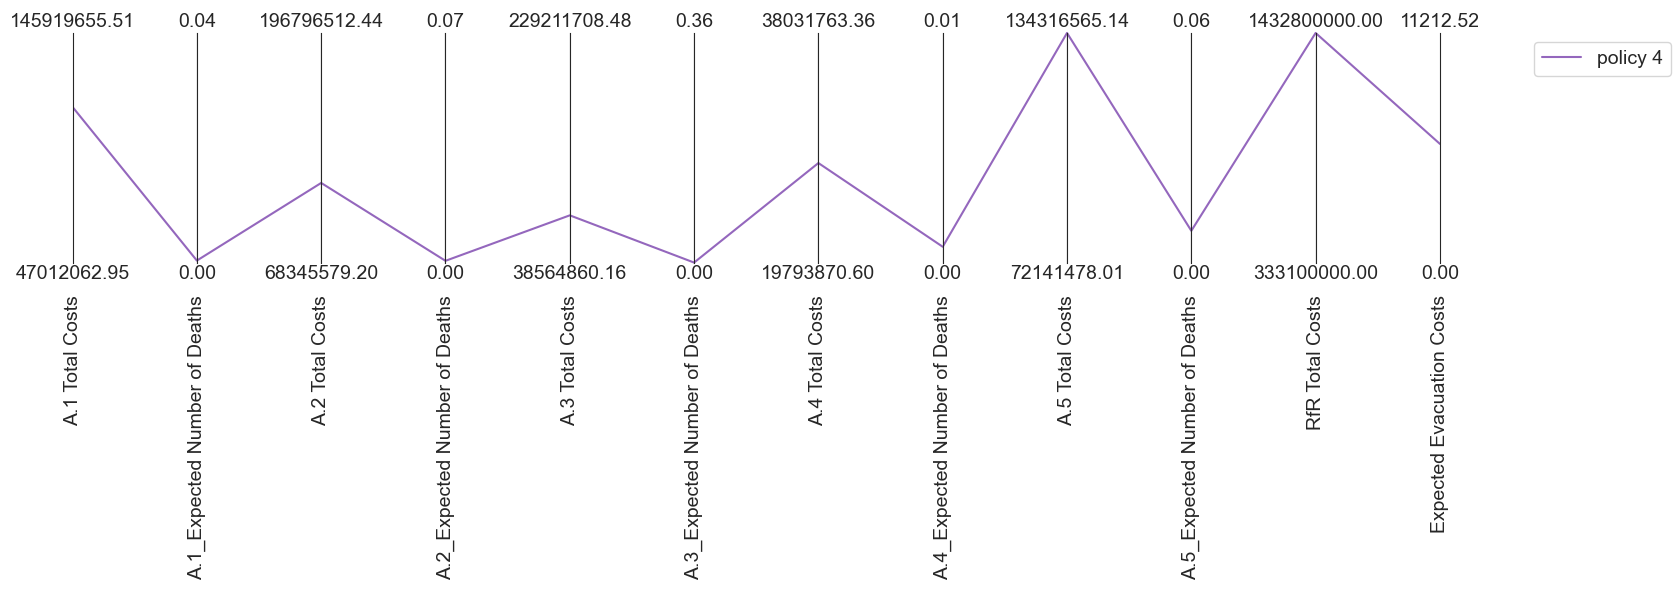

In [163]:
limits = parcoords.get_limits(mean_signal_to_noise)
paraxes = parcoords.ParallelAxes(limits)

colors = iter(sns.color_palette())
fig_w = 15
fig_h = 6

# Choose one policy to plot in a separate figure
isolated_policy_nr = 4
color_iso = 0

for i, row in enumerate(mean_signal_to_noise.iterrows()):
    try:
        color = next(colors)
    except StopIteration:
        # If all colors have been used, create a new iterator
        colors = iter(sns.color_palette())
        color = next(colors)
    paraxes.plot(mean_signal_to_noise.iloc[i], label=f'policy {i}', color=color)

    if i == isolated_policy_nr:
        color_iso = color

# paraxes.invert_axis(o_names)
fig = plt.gcf()
fig.set_size_inches(fig_w, fig_h)

paraxes.legend()
plt.show()

# Plot the isolated policy
paraxes2 = parcoords.ParallelAxes(limits)
paraxes2.plot(mean_signal_to_noise.iloc[isolated_policy_nr], label=f'policy {isolated_policy_nr}', color=color_iso)

# paraxes2.invert_axis(o_names)
fig = plt.gcf()
fig.set_size_inches(fig_w, fig_h)

paraxes2.legend()
plt.show()